In [1]:
datapath = {
    "images_lmdb": "/faststorage/BigEarthNet-V2/BigEarthNet-V2-LMDB",
    "metadata_parquet": "/faststorage/BigEarthNet-V2/metadata.parquet",
    "metadata_snow_cloud_parquet": "/faststorage/BigEarthNet-V2/metadata_for_patches_with_snow_cloud_or_shadow.parquet",
}

from configilm import util
util.MESSAGE_LEVEL = util.MessageLevel.INFO  # use INFO to see all messages


from configilm.extra.DataSets import BENv2_DataSet
from configilm.extra.DataModules import BENv2_DataModule
import pandas as pd
from collections import Counter


/faststorage/arne/mamba/envs/cl_lora_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
meta = pd.read_parquet(datapath["metadata_parquet"])

In [3]:
meta.head()

,patch_id,labels,split,country,s1_name,s2v1_name,contains_seasonal_snow,contains_cloud_or_shadow
0,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Mixed fores...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_26_57,S2A_MSIL2A_20170613T101031_26_57,False,False
1,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Inland wate...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_55,S2A_MSIL2A_20170613T101031_27_55,False,False
2,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Arable land, Broad-leaved forest, Coniferous ...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_56,S2A_MSIL2A_20170613T101031_27_56,False,False
3,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_57,S2A_MSIL2A_20170613T101031_27_57,False,False
4,S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_2...,"[Broad-leaved forest, Complex cultivation patt...",test,Austria,S1B_IW_GRDH_1SDV_20170612T165809_33UUP_27_58,S2A_MSIL2A_20170613T101031_27_58,False,False


In [4]:
meta['country'].value_counts()

country
Finland        155227
Portugal        89792
Serbia          73385
Lithuania       48365
Ireland         48326
Austria         43797
Belgium         11196
Switzerland      4874
Luxembourg       3460
Kosovo           1616
Name: count, dtype: int64

In [5]:
meta['labels']

0         [Arable land, Broad-leaved forest, Mixed fores...
1         [Arable land, Broad-leaved forest, Inland wate...
2         [Arable land, Broad-leaved forest, Coniferous ...
3         [Broad-leaved forest, Complex cultivation patt...
4         [Broad-leaved forest, Complex cultivation patt...
                                ...                        
480033    [Coniferous forest, Mixed forest, Transitional...
480034                    [Coniferous forest, Mixed forest]
480035                                  [Coniferous forest]
480036                                  [Coniferous forest]
480037    [Coniferous forest, Transitional woodland, shrub]
Name: labels, Length: 480038, dtype: object

In [69]:
country_label_counts = {}

for country, group in meta.groupby("country"):
    labels_flat = [label for labels in group["labels"] for label in labels]
    label_counts = Counter(labels_flat)
    country_label_counts[country] = label_counts

country_label_counts

{'Austria': Counter({'Arable land': 28476,
          'Mixed forest': 17553,
          'Broad-leaved forest': 16521,
          'Urban fabric': 15986,
          'Complex cultivation patterns': 13909,
          'Land principally occupied by agriculture, with significant areas of natural vegetation': 13411,
          'Coniferous forest': 13296,
          'Pastures': 10452,
          'Permanent crops': 4582,
          'Inland waters': 2102,
          'Industrial or commercial units': 1685,
          'Natural grassland and sparsely vegetated areas': 1387,
          'Transitional woodland, shrub': 1315,
          'Inland wetlands': 897,
          'Moors, heathland and sclerophyllous vegetation': 224}),
 'Belgium': Counter({'Pastures': 7375,
          'Urban fabric': 7218,
          'Complex cultivation patterns': 6100,
          'Arable land': 5593,
          'Broad-leaved forest': 4502,
          'Land principally occupied by agriculture, with significant areas of natural vegetation': 3264,


In [68]:
# Combine into a DataFrame
label_freq_df = pd.DataFrame(country_label_counts).fillna(0).astype(int)
label_freq_df.index.name = "label"
label_freq_df = label_freq_df.reset_index()

# Calculate relative frequencies
label_freq_df_relative = label_freq_df.set_index('label').apply(lambda x: x / x.sum(), axis=0).reset_index()
label_freq_df_relative.round(2)

,label,Austria,Belgium,Finland,Ireland,Kosovo,Lithuania,Luxembourg,Portugal,Serbia,Switzerland
0,Arable land,0.20,0.13,0.06,0.16,0.12,0.17,0.17,0.14,0.17,0.19
1,Broad-leaved forest,0.12,0.11,0.03,0.03,0.23,0.10,0.17,0.13,0.21,0.06
2,Mixed forest,0.12,0.08,0.23,0.04,0.02,0.13,0.09,0.05,0.02,0.19
3,Pastures,0.07,0.17,0.00,0.33,0.03,0.10,0.16,0.05,0.03,0.08
4,Inland waters,0.01,0.01,0.11,0.01,0.00,0.03,0.01,0.02,0.02,0.04
5,Coniferous forest,0.09,0.06,0.25,0.07,0.01,0.09,0.07,0.03,0.01,0.11
6,Complex cultivation patterns,0.10,0.14,0.00,0.03,0.12,0.13,0.12,0.07,0.14,0.08
7,"Land principally occupied by agriculture, with...",0.09,0.08,0.07,0.05,0.17,0.10,0.08,0.06,0.16,0.03
8,Urban fabric,0.11,0.17,0.01,0.04,0.10,0.04,0.11,0.03,0.06,0.15
9,Industrial or commercial units,0.01,0.02,0.00,0.01,0.02,0.01,0.02,0.01,0.01,0.03


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
label_freq_df_indexed = label_freq_df_relative.set_index('label')
cosine_sim = cosine_similarity(label_freq_df_indexed.T)

# Convert to DataFrame for easier interpretation
cosine_sim_df = pd.DataFrame(cosine_sim, index=label_freq_df_indexed.columns, columns=label_freq_df_indexed.columns)

cosine_sim_df

,Austria,Belgium,Finland,Ireland,Kosovo,Lithuania,Luxembourg,Portugal,Serbia,Switzerland
Austria,1.000000,0.893554,0.567292,0.609267,0.766261,0.933659,0.940799,0.718780,0.800518,0.933964
Belgium,0.893554,1.000000,0.377913,0.732785,0.737113,0.859176,0.959793,0.633847,0.743073,0.842104
Finland,0.567292,0.377913,1.000000,0.361543,0.323967,0.650048,0.420757,0.479611,0.349071,0.656307
Ireland,0.609267,0.732785,0.361543,1.000000,0.384124,0.681348,0.721279,0.507816,0.439065,0.584686
Kosovo,0.766261,0.737113,0.323967,0.384124,1.000000,0.772839,0.784668,0.763462,0.978537,0.573446
Lithuania,0.933659,0.859176,0.650048,0.681348,0.772839,1.000000,0.903397,0.773584,0.837497,0.863224
Luxembourg,0.940799,0.959793,0.420757,0.721279,0.784668,0.903397,1.000000,0.694663,0.804512,0.850546
Portugal,0.718780,0.633847,0.479611,0.507816,0.763462,0.773584,0.694663,1.000000,0.804179,0.606485
Serbia,0.800518,0.743073,0.349071,0.439065,0.978537,0.837497,0.804512,0.804179,1.000000,0.603551
Switzerland,0.933964,0.842104,0.656307,0.584686,0.573446,0.863224,0.850546,0.606485,0.603551,1.000000


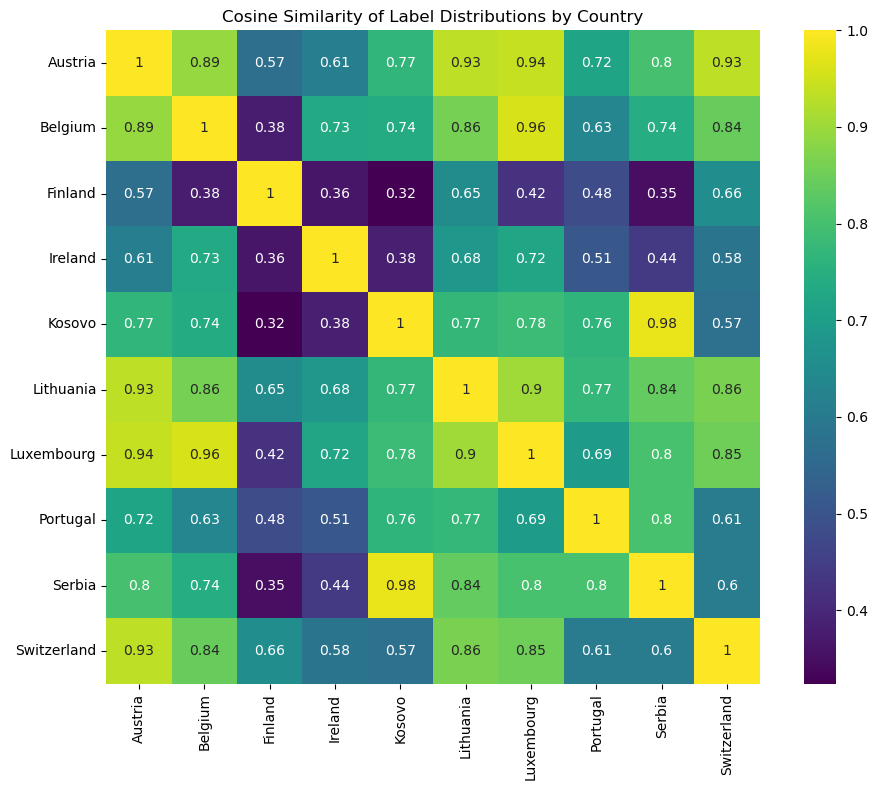

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the similarity matrix is in a DataFrame named sim_df
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, cmap="viridis", square=True)
plt.title("Cosine Similarity of Label Distributions by Country")
plt.tight_layout()
plt.show()


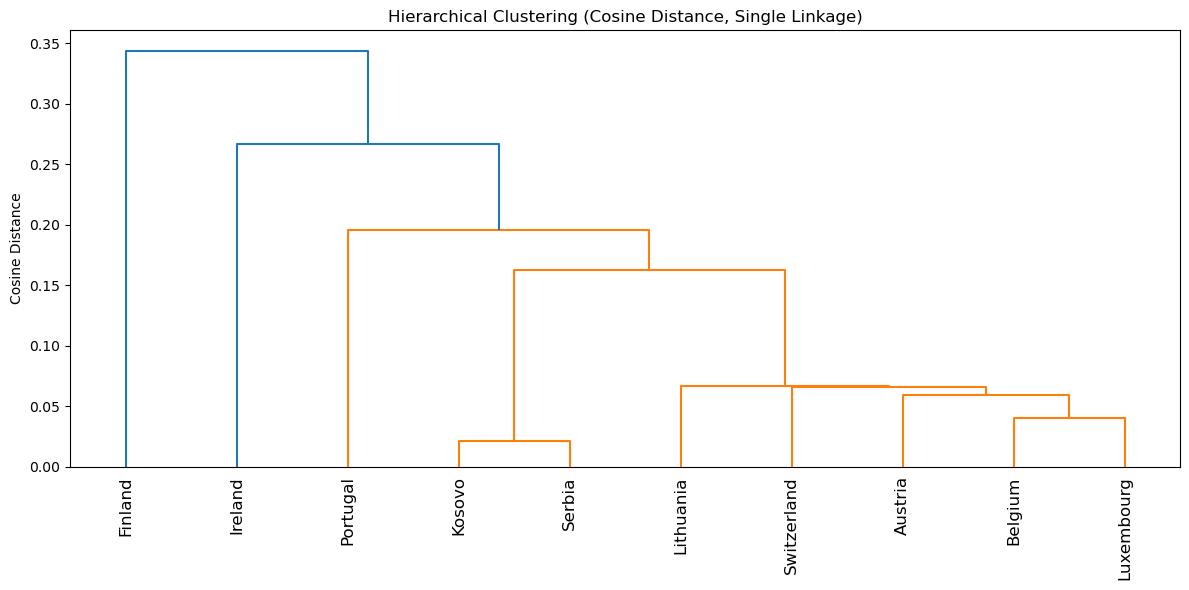

In [64]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Convert similarity matrix to distance matrix
cosine_dist_matrix = 1 - cosine_sim_df.values

# Convert to condensed form
condensed_dist = squareform(cosine_dist_matrix, checks=False)

# Perform clustering
linked = linkage(condensed_dist, method='single')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           labels=cosine_sim_df.columns,
           orientation='top')
plt.title('Hierarchical Clustering (Cosine Distance, Single Linkage)')
plt.ylabel('Cosine Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
